<a href="https://www.kaggle.com/code/lalit7881/student-placement-skills-analytics-2025?scriptVersionId=298641762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-placement-and-skills-analytics-dataset-2025/Student_Placement_Skills_2025.csv


## Title:
Student Placement & Skills Analytics 2025

## Description:
A comprehensive dataset analyzing student academic performance, technical skills, certifications, internships, and placement outcomes to uncover key factors influencing employability and career success in 2025.

In [2]:
df = pd.read_csv("/kaggle/input/student-placement-and-skills-analytics-dataset-2025/Student_Placement_Skills_2025.csv")

In [3]:
df.head()

,Student_ID,Gender,Age,Degree,CGPA,Internships_Count,Projects_Count,Certifications_Count,Technical_Skills_Score_100,Communication_Skills_Score_100,Aptitude_Test_Score_100,Placement_Offer,Salary_Offered_USD
0,1,Male,19,Business,2.56,3,8,0,64,42,57,Yes,8047.08
1,2,Female,27,Engineering,3.66,0,5,2,78,54,40,Yes,3518.56
2,3,Male,26,Data Science,3.73,0,5,1,61,54,49,No,11791.75
3,4,Male,18,Computer Science,2.21,2,8,5,66,42,72,Yes,13946.28
4,5,Male,20,Business,2.59,3,9,2,69,50,53,No,10951.66


In [4]:
df.tail()

,Student_ID,Gender,Age,Degree,CGPA,Internships_Count,Projects_Count,Certifications_Count,Technical_Skills_Score_100,Communication_Skills_Score_100,Aptitude_Test_Score_100,Placement_Offer,Salary_Offered_USD
595,596,Female,22,Business,2.52,3,9,4,59,45,78,No,14940.13
596,597,Male,19,Data Science,2.86,3,9,1,73,81,63,Yes,8607.62
597,598,Male,28,Data Science,2.71,0,5,0,77,96,82,No,16772.72
598,599,Male,26,Engineering,2.97,3,4,3,50,59,60,No,4159.32
599,600,Female,19,Engineering,2.13,4,6,1,69,69,90,No,11214.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student_ID                      600 non-null    int64  
 1   Gender                          600 non-null    object 
 2   Age                             600 non-null    int64  
 3   Degree                          600 non-null    object 
 4   CGPA                            600 non-null    float64
 5   Internships_Count               600 non-null    int64  
 6   Projects_Count                  600 non-null    int64  
 7   Certifications_Count            600 non-null    int64  
 8   Technical_Skills_Score_100      600 non-null    int64  
 9   Communication_Skills_Score_100  600 non-null    int64  
 10  Aptitude_Test_Score_100         600 non-null    int64  
 11  Placement_Offer                 600 non-null    object 
 12  Salary_Offered_USD              600 

In [6]:
df.describe()

,Student_ID,Age,CGPA,Internships_Count,Projects_Count,Certifications_Count,Technical_Skills_Score_100,Communication_Skills_Score_100,Aptitude_Test_Score_100,Salary_Offered_USD
count,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,23.558333,2.978433,2.01500,5.123333,2.583333,69.380000,68.913333,69.426667,11577.438233
std,173.349358,3.455889,0.584822,1.43697,2.632427,1.713071,17.374658,17.359765,17.769192,4734.794274
min,1.000000,18.000000,2.000000,0.00000,1.000000,0.000000,40.000000,40.000000,40.000000,3127.200000
25%,150.750000,21.000000,2.467500,1.00000,3.000000,1.000000,55.000000,54.000000,54.000000,7348.690000
50%,300.500000,24.000000,2.955000,2.00000,5.000000,3.000000,69.000000,68.000000,69.000000,11763.735000
75%,450.250000,26.000000,3.492500,3.00000,7.000000,4.000000,84.000000,84.000000,86.000000,15551.750000
max,600.000000,29.000000,3.990000,4.00000,9.000000,5.000000,99.000000,99.000000,99.000000,19998.130000


In [7]:
df.isnull().sum()

Student_ID                        0
Gender                            0
Age                               0
Degree                            0
CGPA                              0
Internships_Count                 0
Projects_Count                    0
Certifications_Count              0
Technical_Skills_Score_100        0
Communication_Skills_Score_100    0
Aptitude_Test_Score_100           0
Placement_Offer                   0
Salary_Offered_USD                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Student_ID                          int64
Gender                             object
Age                                 int64
Degree                             object
CGPA                              float64
Internships_Count                   int64
Projects_Count                      int64
Certifications_Count                int64
Technical_Skills_Score_100          int64
Communication_Skills_Score_100      int64
Aptitude_Test_Score_100             int64
Placement_Offer                    object
Salary_Offered_USD                float64
dtype: object

In [10]:
df.shape

(600, 13)

In [11]:
df.columns

Index(['Student_ID', 'Gender', 'Age', 'Degree', 'CGPA', 'Internships_Count',
       'Projects_Count', 'Certifications_Count', 'Technical_Skills_Score_100',
       'Communication_Skills_Score_100', 'Aptitude_Test_Score_100',
       'Placement_Offer', 'Salary_Offered_USD'],
      dtype='object')

In [12]:
df.nunique()

Student_ID                        600
Gender                              2
Age                                12
Degree                              5
CGPA                              190
Internships_Count                   5
Projects_Count                      9
Certifications_Count                6
Technical_Skills_Score_100         60
Communication_Skills_Score_100     60
Aptitude_Test_Score_100            60
Placement_Offer                     2
Salary_Offered_USD                600
dtype: int64

## EDA

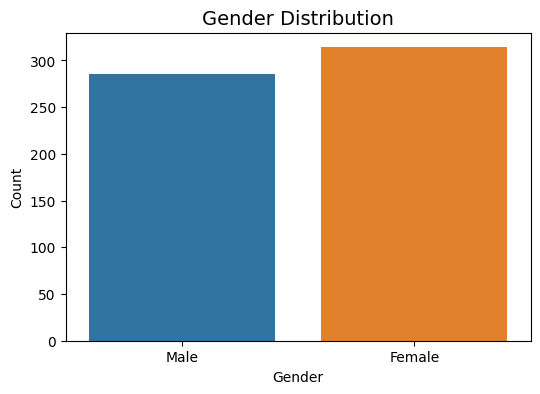

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


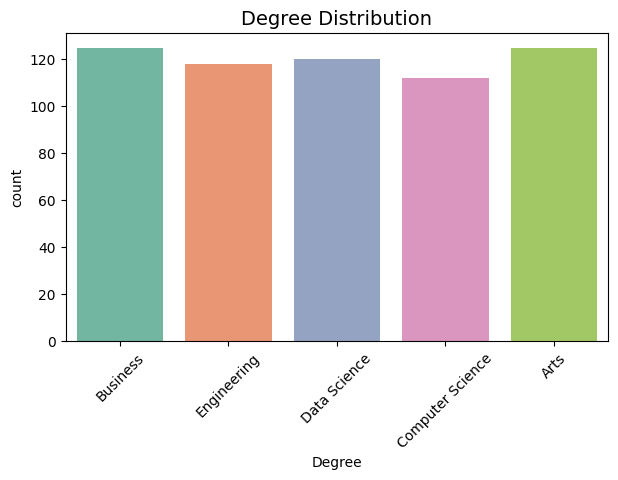

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(x='Degree', data=df, palette='Set2')
plt.title("Degree Distribution", fontsize=14)
plt.xticks(rotation=45)
plt.show()


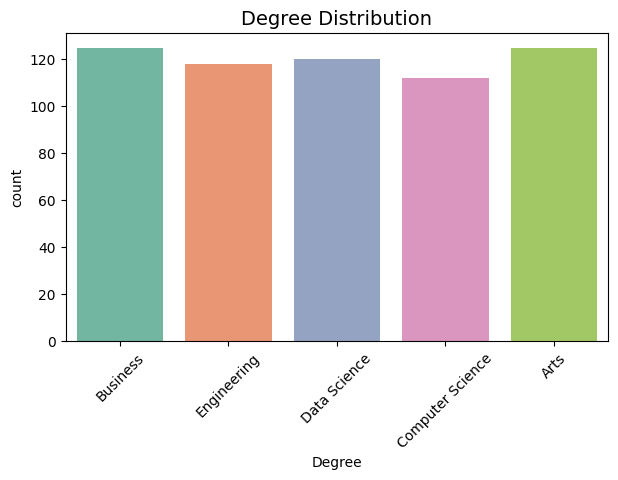

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='Degree', data=df, palette='Set2')
plt.title("Degree Distribution", fontsize=14)
plt.xticks(rotation=45)
plt.show()


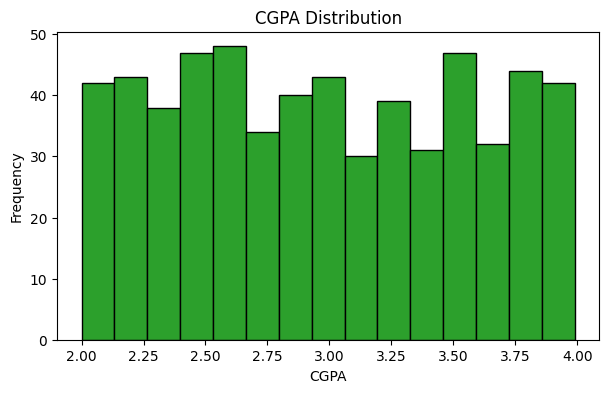

In [16]:
plt.figure(figsize=(7,4))
plt.hist(df['CGPA'], bins=15, color='#2ca02c', edgecolor='black')
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()


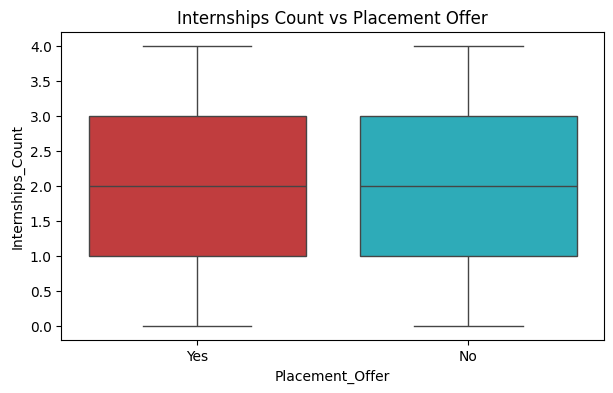

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Placement_Offer', y='Internships_Count', 
            data=df, palette=['#d62728', '#17becf'])
plt.title("Internships Count vs Placement Offer")
plt.show()


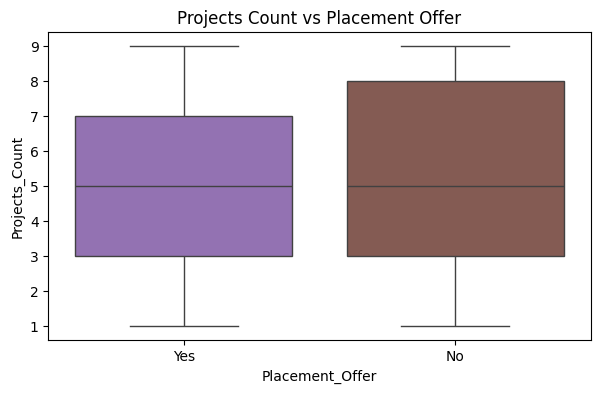

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Placement_Offer', y='Projects_Count', 
            data=df, palette=['#9467bd', '#8c564b'])
plt.title("Projects Count vs Placement Offer")
plt.show()


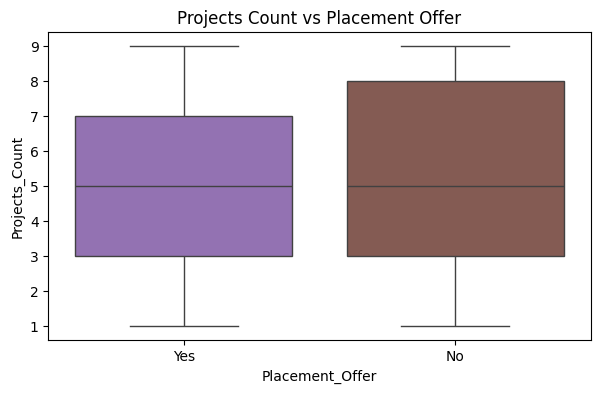

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Placement_Offer', y='Projects_Count', 
            data=df, palette=['#9467bd', '#8c564b'])
plt.title("Projects Count vs Placement Offer")
plt.show()


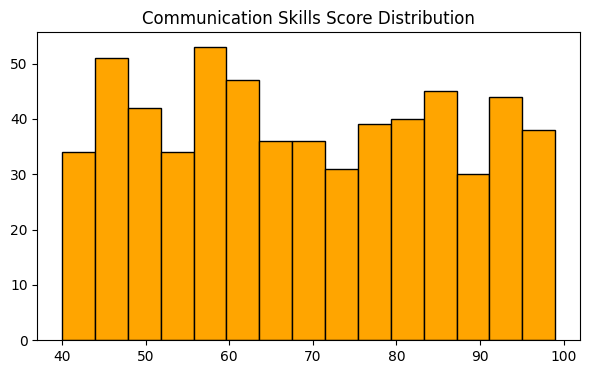

In [20]:
plt.figure(figsize=(7,4))
plt.hist(df['Communication_Skills_Score_100'], 
         bins=15, color='#ffa500', edgecolor='black')
plt.title("Communication Skills Score Distribution")
plt.show()


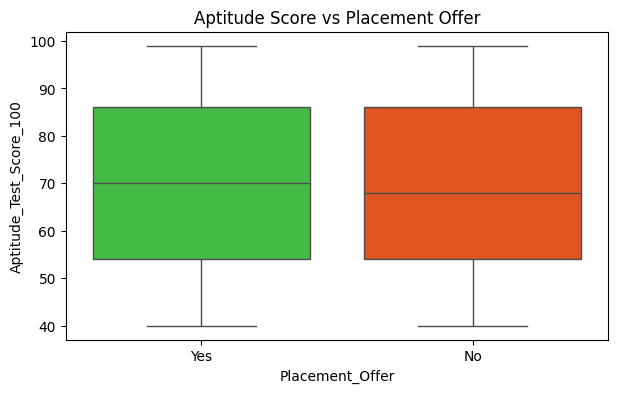

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Placement_Offer', 
            y='Aptitude_Test_Score_100',
            data=df,
            palette=['#32cd32', '#ff4500'])
plt.title("Aptitude Score vs Placement Offer")
plt.show()


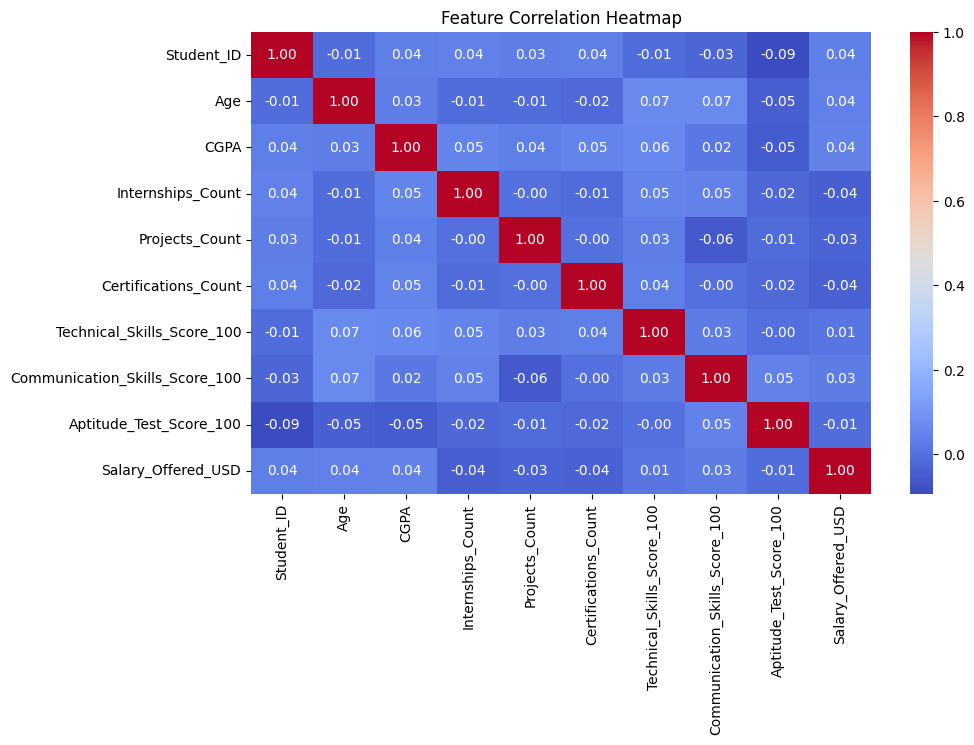

In [22]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


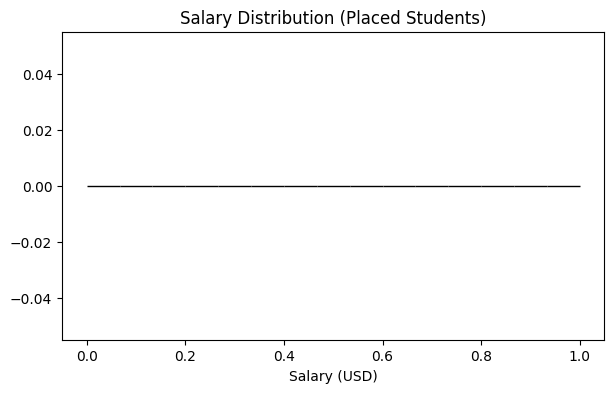

In [23]:
plt.figure(figsize=(7,4))
placed = df[df['Placement_Offer'] == 1]
plt.hist(placed['Salary_Offered_USD'], 
         bins=15, color='#00fa9a', edgecolor='black')
plt.title("Salary Distribution (Placed Students)")
plt.xlabel("Salary (USD)")
plt.show()


## Feature engg

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [25]:
X = df.drop(["Student_ID", "Placement_Offer"], axis=1)
y = df["Placement_Offer"]


In [26]:
categorical_cols = ["Gender", "Degree"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)


In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [30]:
results = {}

for name, model in models.items():
    
    # Create full pipeline
    clf = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy: {:.2f}%".format(acc))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression
Accuracy: 65.83%
Confusion Matrix:
[[ 5 38]
 [ 3 74]]

Decision Tree
Accuracy: 51.67%
Confusion Matrix:
[[17 26]
 [32 45]]

Random Forest
Accuracy: 57.50%
Confusion Matrix:
[[ 2 41]
 [10 67]]

Gradient Boosting
Accuracy: 55.83%
Confusion Matrix:
[[ 5 38]
 [15 62]]

KNN
Accuracy: 60.00%
Confusion Matrix:
[[14 29]
 [19 58]]

SVM
Accuracy: 63.33%
Confusion Matrix:
[[ 0 43]
 [ 1 76]]

Naive Bayes
Accuracy: 65.83%
Confusion Matrix:
[[ 5 38]
 [ 3 74]]



Best Model: Logistic Regression


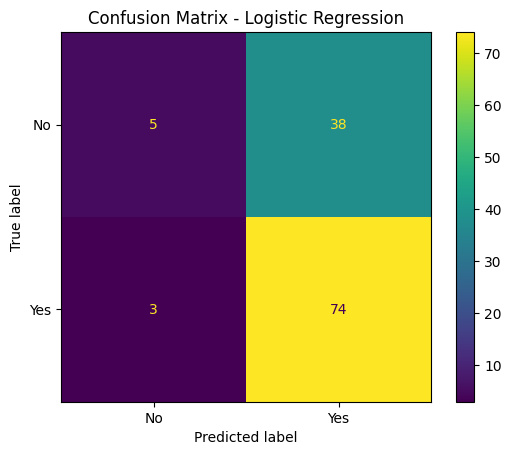

In [31]:
best_model_name = max(results, key=results.get)
print("\nBest Model:", best_model_name)

best_clf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", models[best_model_name])
])

best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [32]:
print("\n==============================")
print("FINAL MODEL COMPARISON")
print("==============================")

for model, acc in results.items():
    print(f"{model}: {acc:.2f}%")



FINAL MODEL COMPARISON
Logistic Regression: 65.83%
Decision Tree: 51.67%
Random Forest: 57.50%
Gradient Boosting: 55.83%
KNN: 60.00%
SVM: 63.33%
Naive Bayes: 65.83%


## Thank you..pls upvote!!!